# Logistic Regression – Multiclass Classification

## 0.Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Importing the dataset

In [7]:
data = pd.read_csv ('Iris.csv')
df = pd.DataFrame(data)

print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


## 2. Separate features (X) and target (y)

In [28]:
X = df.iloc[:,1:-1]
y = df.iloc[:, -1]

print(X.head())
print(y.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


## 3. Split the data into training and testing sets

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 4. Feature scaling

In [31]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Training the Logistic Regression model on the Training set

In [34]:
sgd_model = SGDClassifier(loss='log_loss', max_iter=1, tol=None, random_state=42)

n_epochs = 32
classes = np.unique(y_train)

train_acc_list = []
test_acc_list = []

for epoch in range(n_epochs):
    sgd_model.partial_fit(X_train_scaled, y_train, classes=classes)

    train_acc = accuracy_score(y_train, sgd_model.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, sgd_model.predict(X_test_scaled))

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

    print(f"[Epoch {epoch+1}] Train acc: {train_acc:.4f}  Test acc: {test_acc:.4f}")

[Epoch 1] Train acc: 0.8839  Test acc: 0.8947
[Epoch 2] Train acc: 0.8750  Test acc: 0.8947
[Epoch 3] Train acc: 0.8929  Test acc: 0.9474
[Epoch 4] Train acc: 0.9018  Test acc: 0.9474
[Epoch 5] Train acc: 0.9107  Test acc: 0.9737
[Epoch 6] Train acc: 0.9196  Test acc: 0.9211
[Epoch 7] Train acc: 0.9107  Test acc: 0.8947
[Epoch 8] Train acc: 0.8929  Test acc: 0.9211
[Epoch 9] Train acc: 0.9107  Test acc: 0.9211
[Epoch 10] Train acc: 0.8929  Test acc: 0.9211
[Epoch 11] Train acc: 0.8929  Test acc: 0.9211
[Epoch 12] Train acc: 0.8839  Test acc: 0.9211
[Epoch 13] Train acc: 0.8929  Test acc: 0.9474
[Epoch 14] Train acc: 0.9018  Test acc: 0.9211
[Epoch 15] Train acc: 0.9018  Test acc: 0.9474
[Epoch 16] Train acc: 0.8482  Test acc: 0.9211
[Epoch 17] Train acc: 0.8750  Test acc: 0.9211
[Epoch 18] Train acc: 0.8750  Test acc: 0.9211
[Epoch 19] Train acc: 0.8750  Test acc: 0.9211
[Epoch 20] Train acc: 0.8750  Test acc: 0.9211
[Epoch 21] Train acc: 0.8750  Test acc: 0.9211
[Epoch 22] Train acc: 

## 6. Final model accuracy

In [35]:
y_pred = sgd_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9210526315789473


## 7. Feature weights extraction

In [37]:
feature_names = X.columns

for i, class_label in enumerate(sgd_model.classes_):
    print(f"\n[{class_label}]")
    for name, weight in zip(feature_names, sgd_model.classes_[i]):
        print(f"{name:25}: {weight:.4f}")


[Iris-setosa]


ValueError: Unknown format code 'f' for object of type 'str'

## 8. Visualization of Feature weights

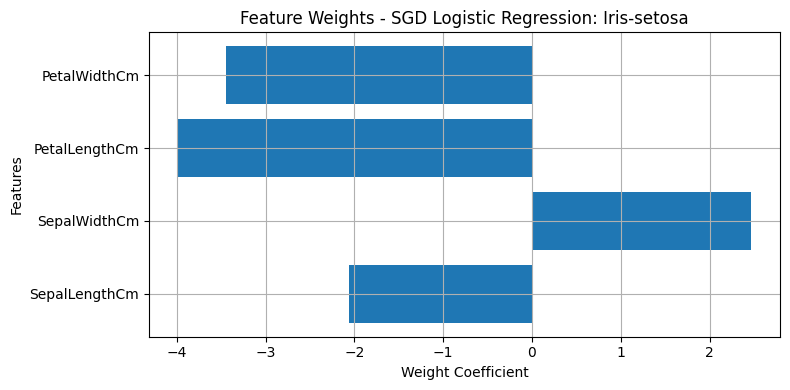

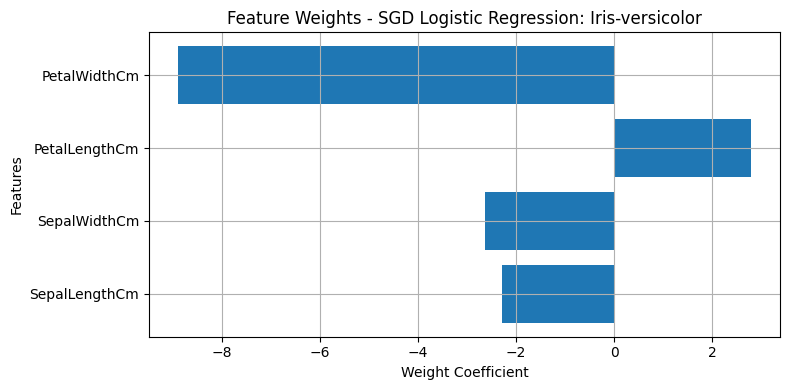

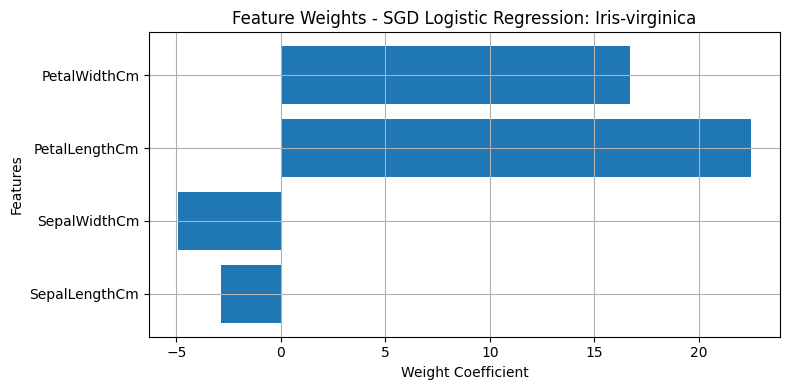

In [ ]:
feature_names = X.columns
weights = sgd_model.coef_

for i, class_label in enumerate(sgd_model.classes_):
    plt.figure(figsize=(8, 4))
    plt.barh(feature_names, weights[i])
    plt.title(f'Feature Weights - SGD Logistic Regression: {class_label}')
    plt.ylabel('Features')
    plt.xlabel('Weight Coefficient')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 9. Visualization of Confusion matrix

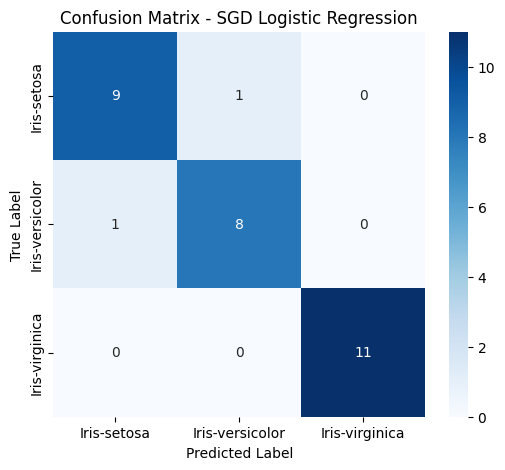

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = sgd_model.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = sgd_model.classes_, yticklabels = sgd_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SGD Logistic Regression')
plt.show()